# The link between behavioral economics and evolution: cooperate behavior in a haystack model

* Patrick Huijbregts (432117)

### Research question

How can evolution explain why people are cooperative in a public good game?


### Motivation

[Behavioral economics](https://en.wikipedia.org/wiki/Behavioral_economics) has become more and more important today in the field of economics. For many economists it is clear that people do not purely behave as a [homo economicus](https://en.wikipedia.org/wiki/Homo_economicus). This can, for instance, be seen in several results of the [dictator game](https://en.wikipedia.org/wiki/Dictator_game) and the [ultimatum game](https://en.wikipedia.org/wiki/Ultimatum_game). The figure below shows some results of the dictator game [(Forsythe, Horowitz, Savin, & Sefton, 1994)](http://pareto.uab.es/prey/ForsytheetalGEB94.pdf), from the figure below we can see that only about 35% behave as a *homo economicus* and choose to give nothing. 
![](https://github.com/ppahuijbregts/assignments/blob/master/Dictator.PNG?raw=true "A dictator game where the proposer could divide $5")
The most important question for a behavioral economist is: why do people, groups or institutions behave the way they do? In this article I will not look for answers why the other participants in the dictator game choose to give something. Instead I will look at a different game, a so called [public good game](https://en.wikipedia.org/wiki/Public_goods_game). The [Nash Equilibrium](https://en.wikipedia.org/wiki/Nash_equilibrium) in this game is to contribute zero, or in other words to behave non-cooperative. However, from different studies we can see that some percentage of participants still choose to contribute something, depending on the round. In the graph below, where the public good game is conducted on large groups, the percentage of participants who contribute something ranges from about 80% in the first round till about 40% in the last round
[(Weimann, Brosig-Koch, Hennig-Schmidt, Keser, & Stahr, 2012)](https://www.uni-goettingen.de/de/document/download/017eb52f5fc7e57ec64cc819f5a0f333.pdf/Weimann%20et%20al%20Large%20Groups.pdf).
![](https://github.com/ppahuijbregts/assignments/blob/master/Public%20good%20game.PNG?raw=true "The first number of each line represents the number of subjects in one group, the second number represents the marginal per capita return")
Even in a last round, when there can be no positive reciprocity, a significant number of subjects chose to contribute something. How can that be? An answer to this question can be found by looking at our prehistoric behavior. Some of our behavior today can be explained by the behavior of our ancestors [(Cartwright, 2014)](https://books.google.nl/books/about/Behavioral_Economics.html?id=IbysAgAAQBAJ&redir_esc=y). Economics, and especially behavioral economics, is a relative new science, but I find it fascinating to see how our actions might already be programmed into our brains a long time ago! 

Note: the different meanings of *dominant* and *dominated* in this article might be confusing. In [game theory](https://en.wikipedia.org/wiki/Game_theory), a [dominant strategy](https://en.wikipedia.org/wiki/Strategic_dominance) means that a certain strategy always generates more utility than any other strategy. In the rest of this article, unless stated otherwise, I refer to most common when talking about dominant. 

### Method and introduction

To answer my research question I first create a [basemodel](#The-assumptions-of-the-basemodel) of evolution, which is explained below. After the explanation of this basemodel I add two different deviations to the basemodel. In the first deviation I transform the basemodel to a [groupmodel](#Two-groups-in-the-world) with [group selection](https://en.wikipedia.org/wiki/Group_selection), and specific a simplified version of the haystack model. With group selection evolution acts on the level of a whole group, instead of only a single individual. There are two different stages in this haystack model. In the first stage, several groups are living individually from each other. Within each group [natural selection](https://en.wikipedia.org/wiki/Natural_selection) will occur, this means that the behavior which generates the most offspring will become the dominant behavior in each group. These groups will live individually for a certain number of generations. In the second stage the different groups will melt into a single group which contains the whole population. The second stage can be seen as the globalization of the world. The first stage can be seen as the era before globalization, when groups did not interact with other groups around the world. A standard haystack model has a third stage where the groups are divided again, but this does not fit into the real world so I will choose to ignore this stage. In the second deviation I create a [model with punishment](#The-model-with-punishment) and add the possibility to punish others into the model. After the introduction of the models, I show [results](#Results-with-different-parameters) for different parameters. I end with a [conclusion and discussion](#Conclusion-and-discussion).
For the modeling I make use of python. First I import some packages in python.

In [1]:
import matplotlib.pyplot as mpl, numpy as np

### Answer
The group selection model does explain how cooperative can be the dominant behavior in the world. Solely on the assumption that there has to be a group, regardless of size, without any freeriders. This group will grow much faster than any group with freeriders, consequently cooperative behavior becomes the dominant behavior in stage 2.
In the model with punishement cooperative behavior can survive if the punish rate is sufficient for the ratio of members who punish and freeriders. 

### The assumptions of the basemodel 
[To method and introduction](#Method-and-introduction)

In this section I explain the basemodel. In the model there is a group of *n* couples. In each generation (*t*) the couples give birth to offspring and die. Each individual in the group posses a trait, this can be a cooperative trait or a non-cooperative trait. All couples have homogeneous traits, so they are only attracted to someone with the same trait. The offspring inherit the trait of the parents. For simplicity, I will mention a couple as a member from now on. Every member of the group search for food to survive (*a*), but only the members with the cooperation trait will search for extra food (*b*) at the loss of some cost (*c*). At the end of the day the gathered food is divided equal to all the members of the group, so the extra food for each member is *b/n* for each cooperator in the group. Or if we denote *q(t)* as the proportion of cooperators in a group at time *t*, the benefits can be written as *bq(t)*. 
The utility of each member is proportional to the number of offspring, so more food will create more offspring. The utility function can be written as:

$$U(t)=a+bq(t)-c$$

Note that *c* is zero for freeriders. In addition, I assume $\frac{b}{n}< c< b$, this means that the total benefits of searching food is higher than the cost, but the individual benefit of searching food is lower than the cost. This assumption is necessarily to be a public good game. Consequently,

$$q(t)=\frac{q(t-1)*U_{c}(t-1)}{[1-q(t-1)]*U_{f}(t-1)+q(t-1)*U_{c}(t-1)}$$



Where $U_{c}$ is the utility for cooperators and $U_{f}$ the utility for freeriders.

This model can be programmed into python. For instance with a=1, b=5, c=0.5 and q(0)=0.95, we get: 

In [2]:
#max is the max from the model, it has no further purpose but it ends the calculation at some point
max=100
#listas is needed for all the graphs below, it will be a list which ranges from 0 till max
listas=[]
t=0
while(t<=max):
    listas=listas+[t]
    t=t+1

#here I define the basemodel
def basemodel(a,b,c,q):
    #qt is our main variable q(t), it creates a list
    qt=[q]
    t=0
    while(t<=max):
        #our formula as described above, the utility functions are filled in
        q=(q*(a+b*q-c))/(q*(a+b*q-c)+(1-q)*(a+b*q))
        #this line add numbers to the lists
        qt=qt+[q]
        t=t+1
    return qt
#the parameters in the model, note q=q(0)
a=1
b=5
c=0.5
q=0.95
qt=basemodel(a,b,c,q)


I can plot the proportion of cooperative members in a graph. 

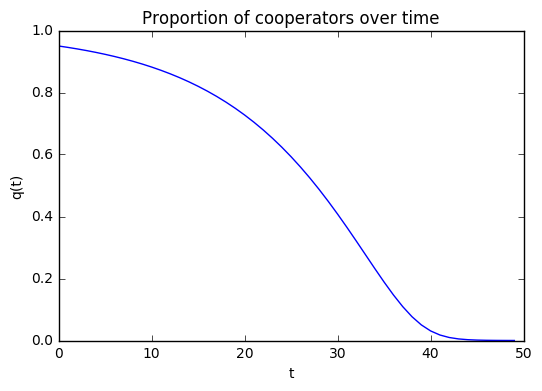

In [3]:
#maxas can be used to to define the horizontal axis
maxas=50
xas=listas[0:maxas]
qtline=qt[0:maxas]

mpl.plot(xas,qtline)
mpl.xlabel('t')
mpl.ylabel('q(t)')
mpl.title('Proportion of cooperators over time')
mpl.show()

As can be seen in the graph above, the graph converges to 0. This happens regardless of the value of the parameters, since a freerider will always have more offspring than a cooperator. However, for higher *a*, *b* and *q(0)*, and a lower *c* it takes more time to converge to 0, I show this [below](#Results-with-different-parameters). Only when an group does not start with a freerider it will start and stay at *q(t)=1*. The graph does not look promising in answering the research question, however this can be changed with some subtle transformations which I show in the parts below.

### Two groups in the world
[To method and introduction](#Method-and-introduction)

The main question which has to be answered now is how cooperative behaviour can survive in such game. A freerider will always produce more offspring than a cooperator and thus become the dominant trait. To answer this question I will transform the basemodel to a group selection model in this part. In the basemodel we only dealt with one group, in the group selection model I will add a second group to the mix. In addition, I assume that in the second group no freerider exist. The utility functions and parameters are the same as in the basemodel, however one can add a subscript to denote the group. Also,

$$Q(t)=\frac{q_{1}(t)*n_{1}+q_{2}(t)*n_{2}}{N}$$

Where *Q(t)* is the proportion of cooperators in the world and *N* is the world population. In Python the model now looks like:

In [4]:
#here I define the groupmodel, I add n to the basemodel so I can compare populations
def groupmodel(a,b,c,q,n):
    t=0
    #nc is the number of cooperators
    nc=q*n
    qt=[q]
    #nct is the number of cooperators in period t
    nct=[nc]
    while(t<=max):
        nc=nc*(a+b*q-c)
        q=(q*(a+b*q-c))/(q*(a+b*q-c)+(1-q)*(a+b*q))
        qt=qt+[q]
        nct=nct+[nc]
        t=t+1
    return nct, qt

a=1
b=5
c=0.5
q1=0.9
n=10
nct1,qt1=groupmodel(a,b,c,q1,n)

#copying for group 2, but without freeriders
q2=1
nct2, qt2 = groupmodel(a,b,c,q2,n)

#here I define the world proportion of cooperators
def world(nct1,nct2,qt1,qt2):
    #creating arrays in orde to make calculations between lists
    nnct1=np.array(nct1)
    nqt1=np.array(qt1)
    #nT is the total amount of members in a group
    nT1=nnct1/nqt1
    #doing the same for group 2
    nnct2=np.array(nct2)
    nqt2=np.array(qt2)
    nT2=nnct2/nqt2
    #world proportion of cooperators is given by
    QT=(nnct1+nnct2)/(nT1+nT2)
    return QT,nT1,nT2

QT,nT1,nT2=world(nct1,nct2,qt1,qt2)

As with the basemodel, I can plot the graph of the proportion of cooperators in the world.

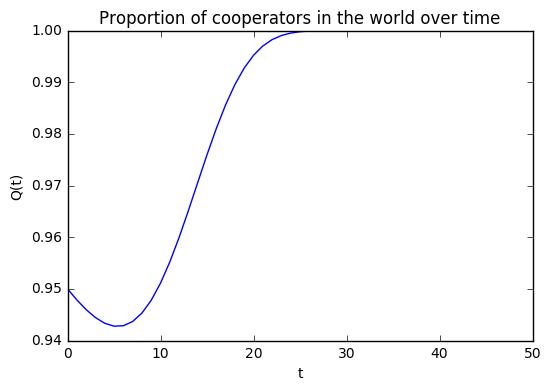

In [5]:
QTline1=QT[0:maxas]
mpl.plot(xas,QTline1)
mpl.xlabel('t')
mpl.ylabel('Q(t)')
mpl.title('Proportion of cooperators in the world over time')
mpl.show()

The reason the graph converges to 1 is because the population in group 2 grows much faster than the population in group 1. In the first periods group 1 can keep up with group 2, because it still have decent amount of cooperators, this does explain the very small drop in the beginning. The number of members in each group can also be plotted with a logarithmic scale, see below. 

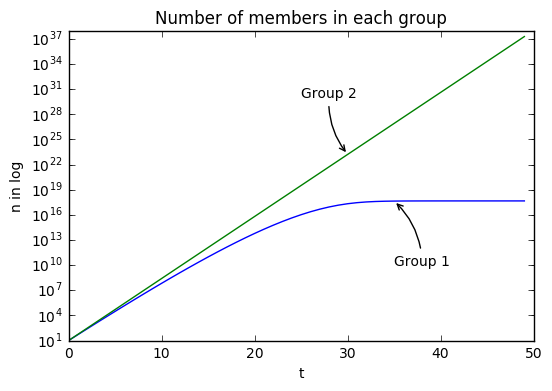

In [6]:
nT1line=nT1[0:maxas]
nT2line=nT2[0:maxas]
mpl.plot(xas,nT1line)
mpl.annotate('Group 1',xy=(35,nT1line[35]),xytext=(35,10**10),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
mpl.plot(xas,nT2line)
mpl.annotate('Group 2',xy=(30,nT2line[30]),xytext=(25,10**30),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
mpl.yscale('log')
mpl.xlabel('t')
mpl.ylabel('n in log')
mpl.title('Number of members in each group')
mpl.show()

This graph does a good job at showing the different growth paths. After period 30 group 1 does not grow anymore, because the proportion of cooperators is close to zero, whereas group 2 grows infinitively. Note that the only reason the line of group 1 converges to non-zero is because *a=1*, for *a>1* it will increase infinitively, for *a<1* it will converges to zero. The graphs do answer the research question. Cooperative behavior can become a dominant trait when making the assumptions of the haystack model I used. The parameters and even the number of groups do not matter for this result, as long as there is one group without any freerider. I explain this further in the part where I show [results with different parameters](#Results-with-different-parameters).

### The model with punishment
[To method and introduction](#Method-and-introduction)

An other answer to the research question can be found when I add the option to punish the others in the model. For instance, [Fehr and Gachter (2000)](http://www.econ.uzh.ch/dam/jcr:ffffffff-9758-127f-ffff-ffffd1ba599b/coop_pun.pdf) have shown that punishment can increase the level of cooperation significantly, which can be seen in the table below.
![](https://github.com/ppahuijbregts/assignments/blob/master/Punishment.PNG?raw=true)
In the model I will increase the number of traits in a group to 3: the cooperators, the non-cooperators and the 'punishers'. As before, every member except for the non-cooperators will search for food at a certain cost. This food will be divided equally among every member of the group. In addition, at a cost of *c* the 'punishers' do punish the freeriders at a 'punish rate' of *r*. The 'punish rate' determines how many freeriders one 'punisher' can punish, subsequently a punished freerider suffers a punishment of *c*. In the model, each freerider will be punished equally and depending on the ratio of punishers (*p(t)*) and freeriders (*1-p(t)-q(t))* the punishment can be smaller or bigger than *c*. When *r* times *p(t)* equals *1-p(t)-q(t)*, each freerider will exactly be punished for *c*. The new utility functions in the model are,

$$U_{c}(t)=a+b*(q(t)+p(t))-c$$
$$U_{p}(t)=a+b*(q(t)+p(t))-2c$$
$$U_{f}(t)=a+b*(q(t)+p(t))-\frac{r*p(t)}{1-q(t)-p(t)}c$$

In a certain way, the cooperators can now be seen as freeriders who do not punish the non-cooperators in the model! This freeriding from punishment yields them a higher utility than the punishers. Luckily, this kind of freeriding does not matter for the results as I explain below. For simplicity, one could even delete this trait from the population without changing any of the results, but I do like a challenge, so I leave them in the model. Since there are now three different traits in the group it is necessarily to have two main variables. I use the proportion of cooperators and the proportion of punishers as my main variables. The equations are,

$$q(t)=\frac{q(t-1)*U_{c}(t-1)}{q(t-1)*U_{c}(t-1)+p(t-1)*U_{p}(t-1)+[1-p(t-1)-q(t-1)]*U_{f}(t-1)}$$
$$p(t)=\frac{p(t-1)*U_{p}(t-1)}{q(t-1)*U_{c}(t-1)+p(t-1)*U_{p}(t-1)+[1-p(t-1)-q(t-1)]*U_{f}(t-1)}$$

This new model can be programmed in Python as follows:

In [7]:
#here I define the model with punishment, p=proportion of punishers in p(0), r=punish rate
def punishmodel(a,b,c,q,p,r):
    qt=[q]
    pt=[p]
    t=0
    while(t<=max):
        #when q+p=1, there are no freeriders in the model, and thus nothing changes
        if q+p!=1:
            #when the cost of the punishment is bigger than the benefits of freeriding, the freeriders will go extinct.
            if r*c*p/(1-(q+p))>=a+b*(q+p):
                #Since there is no one to be punished then, everyone will become a cooperator
                q=1
                p=0
            else:
                #the utilities put into the equations. 
                #I need ptemp, because otherwise q will use the 'new p' instead of the 'old p'
                ptemp=(p*(a+b*(q+p)-2*c))/(q*(a+b*(q+p)-c)+p*(a+b*(q+p)-2*c)+(1-q-p)*(a+b*(q+p)-r*c*p/(1-q-p)))
                q=(q*(a+b*(q+p)-c))/(q*(a+b*(q+p)-c)+p*(a+b*(q+p)-2*c)+(1-q-p)*(a+b*(q+p)-r*c*p/(1-q-p)))
                p=ptemp
        qt=qt+[q]
        pt=pt+[p]
        t=t+1
    return qt,pt

a=1
b=5
c=0.5
q=0.1
p=0.6
r=1
qt,pt=punishmodel(a,b,c,q,p,r)



I can plot the proportion of the cooperators, punishers and freeriders in a graph.

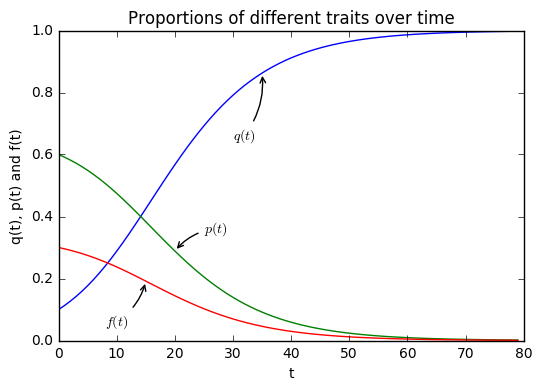

In [8]:
maxas=80
xas=listas[0:maxas]
qtline=qt[0:maxas]
ptline=pt[0:maxas]
nqtline=np.array(qtline)
nptline=np.array(ptline)
#the ftline line shows the proportion of freeriders
ftline=1-(nqtline+nptline)

mpl.plot(xas,qtline)
mpl.annotate('$q(t)$',xy=(35,qtline[35]),xytext=(30,0.65),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
mpl.plot(xas,ptline)
mpl.annotate('$p(t)$',xy=(20,ptline[20]),xytext=(25,0.35),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
mpl.plot(xas,ftline)
mpl.annotate('$f(t)$',xy=(15,ftline[15]),xytext=(8,0.05),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
mpl.xlabel('t')
mpl.ylabel('q(t), p(t) and f(t)')
mpl.title('Proportions of different traits over time')
mpl.show()

The graph above converges to a group where only cooperators exist. This model will always converge to a group with either only freeriders or no freeriders. Whether it converges to the first or to the latter depends on the solutions of the utility functions of the freeriders and punishers. When the utility of the freeriders in the first period is higher than the utility of the punishers (even if the utility of the cooperators is higher) the freeriders become the dominant trait. Or stated otherwise, when the utility of the punishers is equal or higher than the punishment of the freeriders. So when, 

$$a+b*(q(0)+p(0))-2c\geq a+b*(q(0)+p(0))-\frac{r*p(0)}{1-q(0)-p(0)}c$$

Which solves for,

$$r\geq 2*\frac{1-q(0)-p(0)}{p(0)}$$

One can see that this solely depends on the punish rate and the ratio between the freeriders and the punishers. It does not depend on any other variable, including the ratio of cooperators. However, in a model without any cooperators $\geq$ has to be replaced by >.

### Results with different parameters
[To method and introduction](#Method-and-introduction)

In this part I show results with different parameters. First, I start with the basemodel, where none of the parameters matter for the result. Second, in the group selection model none of the parameters matter if they are the same for both groups, they do matter if they can different. Third, in the model with punishment, almost all the variables do not matter for the result.

##### Basemodel
[To the model](#The-assumptions-of-the-basemodel)

In the basemodel the proportion of cooperators will always converge to zero, because the utility of freeriders is always more than the utility of cooperators. However, the time it takes to converge to zero differs. For instance, if I change [ceteris paribus](https://en.wikipedia.org/wiki/Ceteris_paribus) *b* to 2, *c* to 1 or *q(0)* to 0.8 the graphs will converge to zero much quicker as can be seen below.

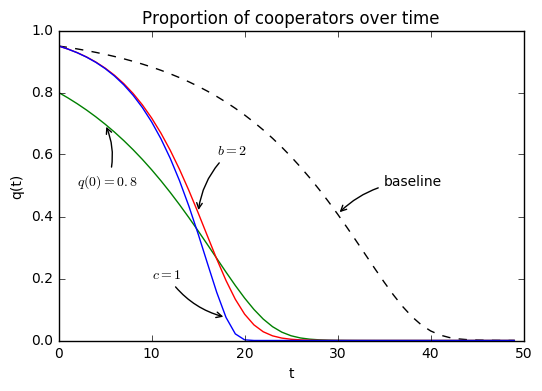

In [9]:
#the base variables
a=1
b=5
c=0.5
q=0.95
qt1 = basemodel(a,b,c,q)
 
#result for q(0)=0.8    
q=0.8
qt2 = basemodel(a,b,c,q)

#result for b=2
b=2
q=0.95
qt3 = basemodel(a,b,c,q)

#result for c=1
b=5
c=1
qt4 = basemodel(a,b,c,q)

maxas=50
xas=listas[0:maxas]
qtline1=qt1[0:maxas]
qtline2=qt2[0:maxas]
qtline3=qt3[0:maxas]
qtline4=qt4[0:maxas]

mpl.plot(xas,qtline1,'--', color='black')
mpl.annotate('baseline',xy=(30,qtline1[30]),xytext=(35,0.5),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
mpl.plot(xas,qtline2,color='g')
mpl.annotate('$q(0)=0.8$',xy=(5,qtline2[5]),xytext=(2,0.5),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
mpl.plot(xas,qtline3,color='r')
mpl.annotate('$b=2$',xy=(15,qtline3[15]),xytext=(17,0.6),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
mpl.plot(xas,qtline4,color='b')
mpl.annotate('$c=1$',xy=(18,qtline4[18]),xytext=(10,0.2),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
mpl.xlabel('t')
mpl.ylabel('q(t)')
mpl.title('Proportion of cooperators over time')
mpl.show()

In the baseline it takes about 45 periods to have an insignificant number of cooperators. With different variables as shown in the graph this time is between 20 and 30 periods.

##### Model with multiple groups
[To the model](#Two-groups-in-the-world)

One can see from the previous graph that in a group with a freerider the graph always converge to 0 regardless of the parameters. In a group without a freerider the graph will always stay at 1. Even if there are a lot more groups where a freerider is present. I show this below, where the starting amount of members in group 1 is ten times higher than the starting amount of members in group 2. This is similar to a setting with 10 groups with a freerider. 

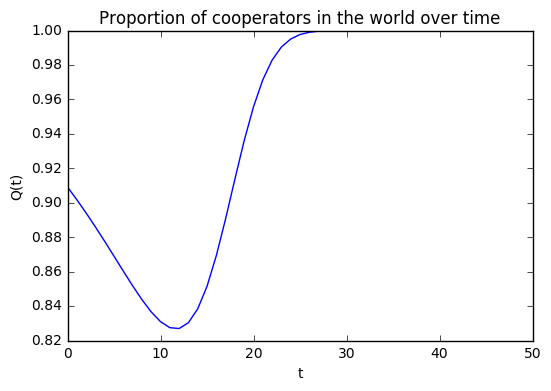

In [10]:
a=1
b=5
c=0.5
q1=0.9
n1=100
nct1,qt1=groupmodel(a,b,c,q1,n1)

q2=1
n2=10
nct2,qt2=groupmodel(a,b,c,q2,n2)

QT,nT1,nT2=world(nct1,nct2,qt1,qt2)


QTline2=QT[0:maxas]
mpl.plot(xas,QTline2)
mpl.xlabel('t')
mpl.ylabel('Q(t)')
mpl.title('Proportion of cooperators in the world over time')
mpl.show()

The graph shows that the cooperation trait becomes dominant, even with bigger or more groups. If one assume the parameters are the same between the groups, then the group without freerider will always grow faster (remember I assume *b>c*), and eventually cooperation becomes the dominant trait. However, if one assume these parameters can differ between groups, then the story is different. Cooperative behavior will be dominant when the group without freeriders will grow faster than the group with freeriders, so if,

$$U_{c2}> U_{f1}$$
$$a_{2}+b_{2}-c_{2}> a_{1}$$

The utility of cooperators in group 1 do not matter, because after some time, there will be an insiginifanct proportion of cooperators. Below I show what happens with *Q(t)* when this equation does not hold.

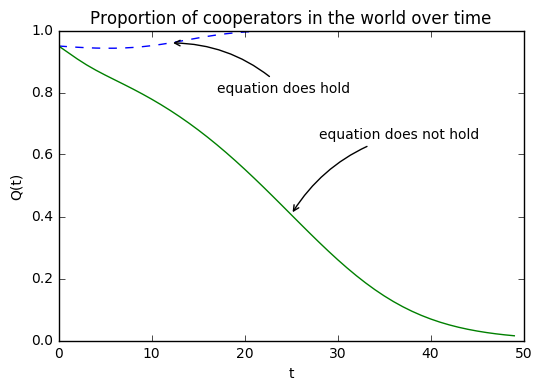

In [11]:
#variables for group 1
a=3
b=3
c=0.5
q=0.9
n=10
nct1, qt1 = groupmodel(a,b,c,q,n)

#variables for group 2, note that 1+2-0.2<3
a=1
b=2
c=0.2
q=1
n=10
nct2, qt2 = groupmodel(a,b,c,q,n)

QT,nT1,nT2=world(nct1,nct2,qt1,qt2)
QTline3=QT[0:maxas]
mpl.plot(xas,QTline1,'--')
mpl.annotate('equation does hold',xy=(12,QTline1[12]),xytext=(17,0.8),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
mpl.plot(xas,QTline3)
mpl.annotate('equation does not hold',xy=(25,QTline3[25]),xytext=(28,0.65),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
mpl.xlabel('t')
mpl.ylabel('Q(t)')
mpl.title('Proportion of cooperators in the world over time')
mpl.show()

##### Model with punishment
[To the model](#The-model-with-punishment)

In the model with punishment the punish rate has te be high enough (2 times the ratio of freeriders over punishers). The other variables do not matter as I already explained above. The graph below shows what happens when the punish rate is not high enough.

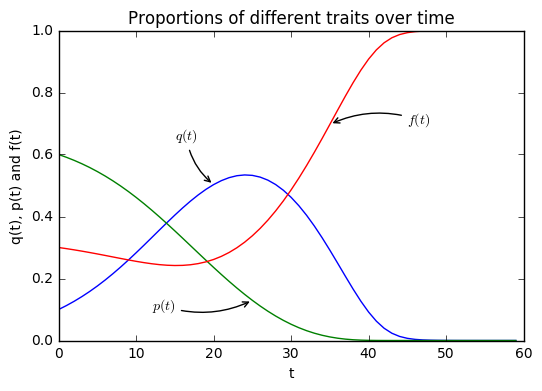

In [12]:
#the same variables as before, but with a punish rate of 0.99 instead of 1, which is not high enough
a=1
b=5
c=0.5
q=0.1
p=0.6
r=0.99

qt,pt=punishmodel(a,b,c,q,p,r)
    
maxas=60
xas=listas[0:maxas]
qtline=qt[0:maxas]
ptline=pt[0:maxas]
nqtline=np.array(qtline)
nptline=np.array(ptline)
ftline=1-(nqtline+nptline)

mpl.plot(xas,qtline)
mpl.annotate('$q(t)$',xy=(20,qtline[20]),xytext=(15,0.65),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
mpl.plot(xas,ptline)
mpl.annotate('$p(t)$',xy=(25,ptline[25]),xytext=(12,0.1),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
mpl.plot(xas,ftline)
mpl.annotate('$f(t)$',xy=(35,ftline[35]),xytext=(45,0.7),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
mpl.xlabel('t')
mpl.ylabel('q(t), p(t) and f(t)')
mpl.title('Proportions of different traits over time')
mpl.show()

In the first periods the cooperators increase, because the utility of the cooperators is larger than the utility of the freeriders and punishers. However, because the utility of punishers is lower than the utility of freeriders, the proportion of punishers declines faster than the proportion of freeriders. Eventually there are more freeriders than punishers and from that point on the utility of freeriders becomes greater than the utility of cooperators, which means that the freeriders becomes the dominant type in the population.

### Conclusion and discussion
[To method and introduction](#Method-and-introduction)

Although the models I used had quite some variables, the value of those variables did not matter for most of the models. In the theory of evolution a trait becomes dominant when it can produce more offspring. This can also be seen in the different models. In the basemodel freeriders will always become the dominant trait, simply because of a higher utility (and thus more offspring). In the model with multiple groups, the group which produces more offspring becomes the dominant group in the world. Finally, in the model with punishment it is important that the punishers have a higher utility than the freeriders.

One can argue how important the behavior of our ancestors is for the way we behave today. However, as can be seen from the modified haystack model, groups who cooperated better had a much better chance to survive and to populate. This can in turn create a 'do cooperate' heuristic in our brain. And perhaps when people today play a public good game, they still act to that heuristic. Since this might also be a result of positive reprocity, there has to be done more research to find out exactly why people choose to contribute. This can be done in several different settings, with several different treatments. For instance, a one shot game can reveal whether positive reprocity is important. Also, different settings with punishment can show how much people are willing to punish and whether people punish hard and often enough. 

### References
Cartwright, E. (2014). *Behavioral economics*, London, England: Routledge

Fehr, E., & Gachter, S. (2000). Cooperation and Punishment in Public Goods Experiments. *American Economic Review*, 90(4): 980-994.

Forsythe, R., Horowitz, J., Savin, N., & Sefton, M. (1994). Fairness in simple bargaining experiments, *Games and Economic Behavior*, 6: 347-369

Weimann, J., Brosig-Koch, J., Hennig-Schmidt, H., Keser, C., & Stahr, C. (2012). Public-good experiments with large groups.